# Data prepocessing

## importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy

## Understanding dataset

In [9]:
df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Removing null values

In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
# as no null values found, no treatment needed

## Checking for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6ba112c30>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6bba98740>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6ba0f2510>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6bba98bf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6bba98ef0>],
 'means': []}

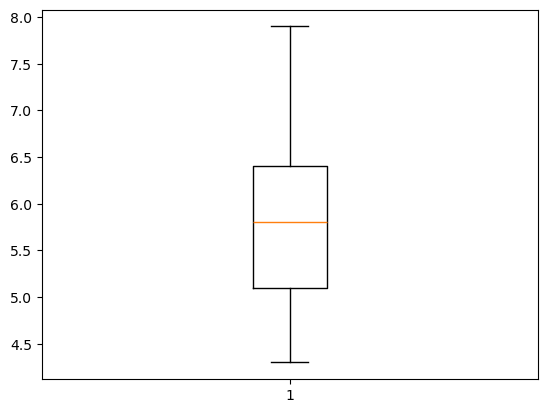

In [34]:
plt.boxplot(df['sepal_length'])

In [36]:
# no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6bbbffe90>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6bbc443e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6bbbffbc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6bbc44800>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6bbc44b00>],
 'means': []}

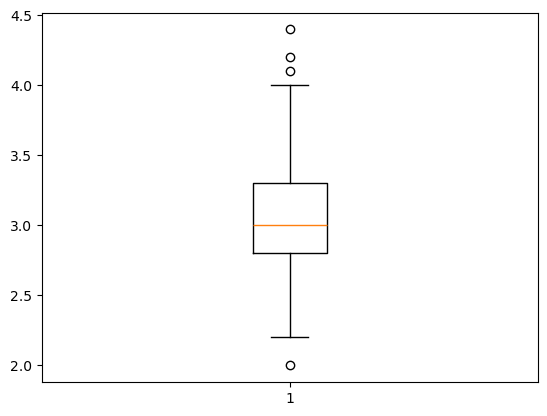

In [38]:
plt.boxplot(df['sepal_width'])

In [46]:
# outliers found

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6bbc862d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6bbc868d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6bbc85fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6bbc86b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6bbc86db0>],
 'means': []}

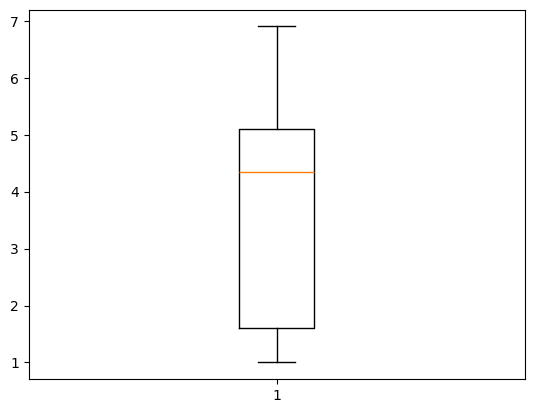

In [40]:
plt.boxplot(df['petal_length'])

In [48]:
# no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6bbad5010>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6bbad5610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6bbad4d70>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6bbad5a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6bbad5ca0>],
 'means': []}

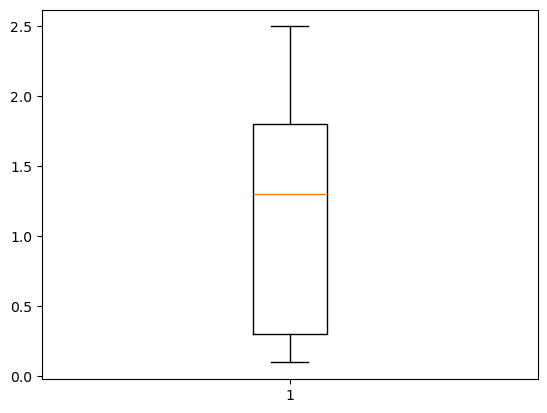

In [42]:
plt.boxplot(df['petal_width'])

In [44]:
#no outliers

## Treating outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2b6bbb747a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b6bbb74cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b6bbb744d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b6bbb752b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b6bbb755e0>],
 'means': []}

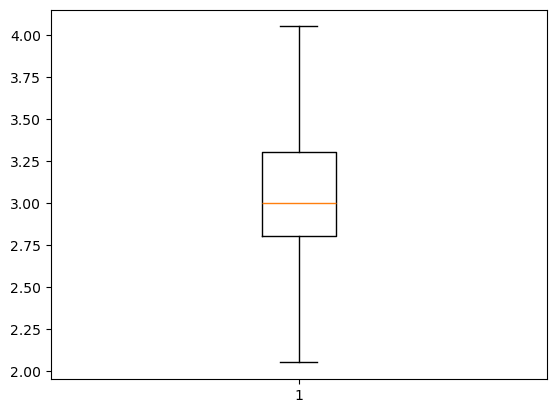

In [53]:
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['sepal_width'] = df['sepal_width'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
plt.boxplot(df['sepal_width'])

## Data visualization

### histogram for each column(except target)

Text(0.5, 1.0, 'Sepal length')

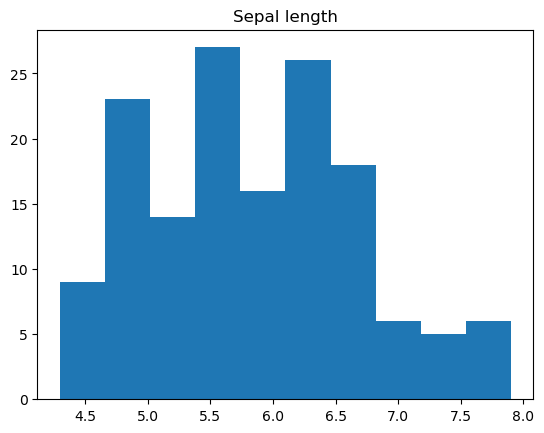

In [146]:
plt.hist(df['sepal_length'])
plt.title("Sepal length")

Text(0.5, 1.0, 'Sepal width')

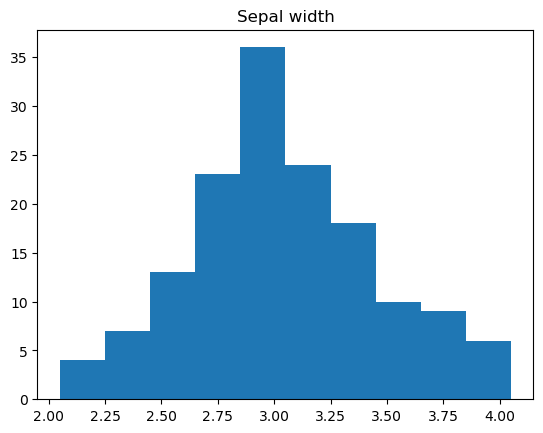

In [148]:
plt.hist(df['sepal_width'])
plt.title("Sepal width")

Text(0.5, 1.0, 'petal length')

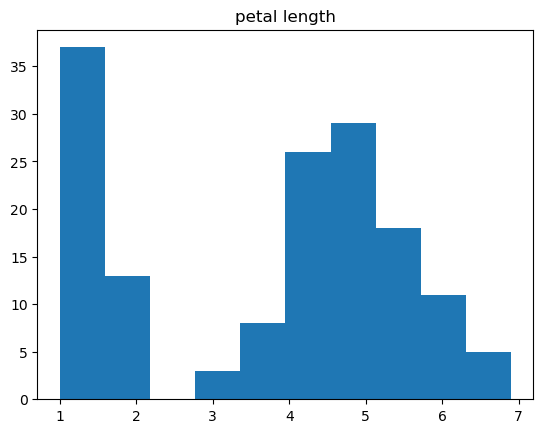

In [150]:
plt.hist(df['petal_length'])
plt.title("petal length")

Text(0.5, 1.0, 'petal width')

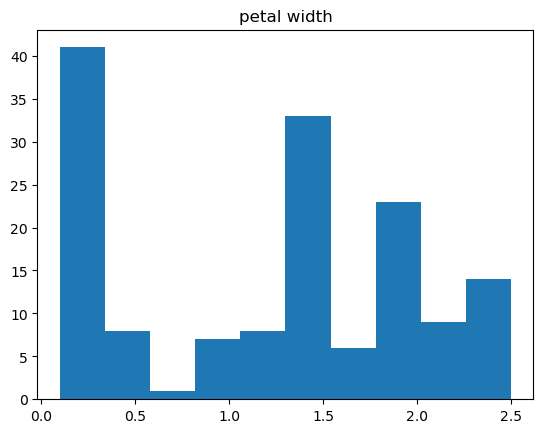

In [152]:
plt.hist(df['petal_width'])
plt.title("petal width")

### count plot for target variable

Text(0.5, 1.0, 'Species')

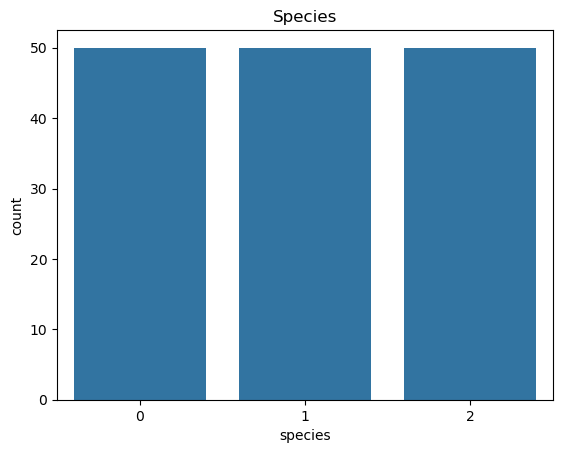

In [181]:
sns.countplot(x='species', data=df)
plt.title("Species")

## Encoding 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species']=encoder.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Spliting the dataset

In [65]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
y = df['species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Scaling the dataset

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

## Balancing dataset

In [90]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [92]:
# no balancing required

# Using lasso tool

## Feature selection

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])
X_train

In [156]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
lasso = Lasso(alpha=0.01) 
lasso.fit(X_train, y_train)
model = SelectFromModel(lasso, threshold="mean")  
X_train_lasso_selected = model.transform(X_train)
selected_features_lasso = X_train.columns[model.get_support()]
selected_features_lasso

C:\Users\joshi\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['petal_length', 'petal_width'], dtype='object')

# Adding classifer

## Using a classifer

In [126]:
new_X_train=X_train.drop(columns=['sepal_length','sepal_width'])
new_X_test=X_test.drop(columns=['sepal_length','sepal_width'])

In [128]:
new_X_train_scaled=scaler.fit_transform(new_X_train)
new_X_test_scaled=scaler.fit_transform(new_X_test)

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier(random_state=42)
classifier.fit(new_X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Testing for accuracy

In [168]:
y_pred = classifier.predict(new_X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158
